In [6]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread
from skimage.transform import resize
from scipy.ndimage.filters import convolve

(512, 512)


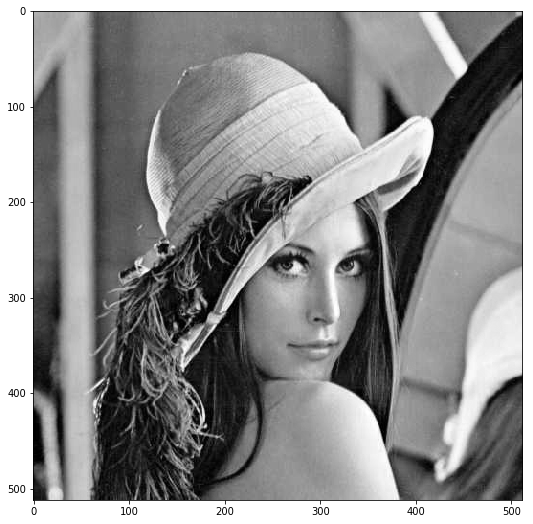

In [7]:
im = imread("../imageProcessing/samples/lena.jpg", pilmode="L")

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, cmap=plt.cm.gray)
plt.show()

# Exersice 2: Spatial Filtering (Convolution)

**Filtering** is a discrete convolution of an image $I$ with a filter mask $A \in \mathbb{R}^{m \times n}$:

$$
\begin{align}
 I_{A}       &= I * A \\
 I_{A}(i, j) &= \left(I * A\right)(i, j) \\
                                       &= \sum_{h=-\frac{m}{2}}^{\frac{m}{2}} \sum_{k=-\frac{n}{2}}^{\frac{n}{2}} A\left(h + \frac{m}{2} , k+\frac{n}{2}\right) \cdot I(i-h, j-k)
\end{align}
$$

Typically, the filter masks are square matrices, meaning $n=m$.
A special filter mask can be a **box filter**:

$$
\begin{align}
  B =%
  \dfrac{1}{9}\begin{pmatrix}
              1&1&1\\1&1&1\\1&1&1
             \end{pmatrix}.
\end{align}
$$

## Task 2 - Difference between filter result and input
*Hint: for these Tasks convert the pixel values to the range [0.0 ... 1.0]* 
- Compute the a convolution $I_B$ of an image $I$ with a box filter $B$
- Compute the difference image $D_B=I_B-I$ and visualize the result. How can we interpret the result? 
- What is the mathematical background behind this difference image (*hint: dirac impulse*)?
- How can we compute $D_B$ directly from $I$ and $B$ without the intermediate $I_B$?
- Compare the two ways of computing the difference image.

### Solutions

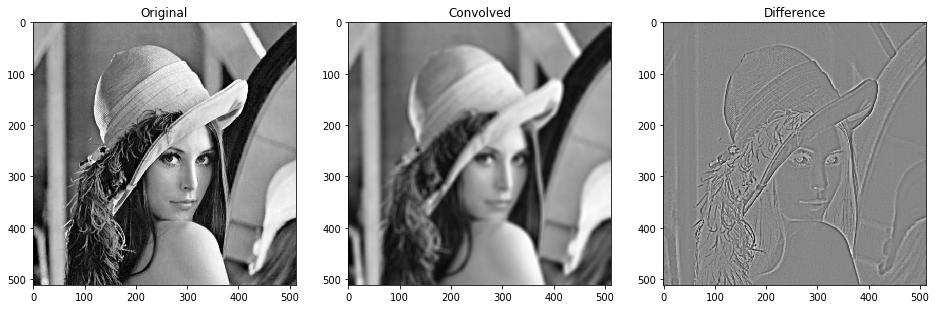

In [31]:
# TODO: convert pixel range from [0 .. 255] to [0 .. 1] 
I = im/255

size = 9
B = np.ones((size, size))/ size**2

I_B = convolve(I, B)
D_B = I_B-I

fig, axs = plt.subplots(1,3, figsize=(16,9))

axs[0].imshow(I, cmap=plt.cm.gray)
axs[0].set_title("Original")

axs[1].imshow(I_B, cmap=plt.cm.gray)
axs[1].set_title("Convolved")

axs[2].imshow(D_B, cmap=plt.cm.gray)
axs[2].set_title("Difference")

plt.show()

In [30]:
I = im/255
print(I)
type(I)
B = (1/9)*np.ones(9).reshape(3,3)
I_B = convolve(I, B)
I_B
D_B

[[0.67843137 0.67843137 0.67843137 ... 0.73333333 0.61568627 0.45490196]
 [0.68627451 0.68235294 0.68235294 ... 0.74117647 0.65098039 0.50588235]
 [0.69019608 0.69019608 0.68627451 ... 0.72941176 0.63529412 0.50196078]
 ...
 [0.05882353 0.0627451  0.07058824 ... 0.34901961 0.34509804 0.35294118]
 [0.0627451  0.06666667 0.0745098  ... 0.36078431 0.36862745 0.37647059]
 [0.07058824 0.07843137 0.08627451 ... 0.37254902 0.38823529 0.4       ]]


Array([[5.44705882, 5.44313725, 5.42745098, ..., 5.51764706, 4.89019608,
        4.25882353],
       [5.4745098 , 5.47058824, 5.45490196, ..., 5.52156863, 4.91764706,
        4.32156863],
       [5.50196078, 5.49019608, 5.47843137, ..., 5.55294118, 4.99215686,
        4.44313725],
       ...,
       [0.51764706, 0.54901961, 0.59607843, ..., 2.77647059, 2.80392157,
        2.81568627],
       [0.52941176, 0.56470588, 0.61568627, ..., 2.89019608, 2.94509804,
        2.98431373],
       [0.56078431, 0.59607843, 0.64705882, ..., 2.96470588, 3.03921569,
        3.09803922]])

### Mathematical background

*TODO: use the dirac impulse to construct $C$ from $B$*

$$
\begin{align}
D_B &= I - I_B \\
D_B &= I - I * B \\
D_B(i, j) &= I(i,j) - \left(I * B\right)(i, j) \\
 &= I(i,j) -\sum_{h=-\frac{m}{2}}^{\frac{m}{2}} \sum_{k=-\frac{n}{2}}^{\frac{n}{2}} B\left(h + \frac{m}{2} , k+\frac{n}{2}\right) \cdot I(i-h, j-k) \\
 \dots \\
D_B &= I * C
\end{align}
$$
with $C=???$

### Comparison

In [ ]:
I = im/255

size = 9
B = np.ones((size, size)) // size**2

dirac = np.zeros_like(B)
middle = int((size-1))

D_B = I - convolve(I, B)
D_C = convolve(I, C)

abs_diff = np.abs(D_C - D_B)

print("MAP Error: {:.4g}".format(abs_diff.mean()))
print("Are these images identical?", np.allclose(D_C, D_B))

fig, axs = plt.subplots(1,4, figsize=(16,9))

axs[0].imshow(I, cmap=plt.cm.gray)
axs[0].set_title("Original")

axs[1].imshow(D_B, cmap=plt.cm.gray)
axs[1].set_title("$D_B$: Convolved and subtracted")

axs[2].imshow(D_C, cmap=plt.cm.gray)
axs[2].set_title("$D_C$: Convolved Directly")

axs[3].imshow(abs_diff, vmin=0, vmax=1, cmap=plt.cm.gray)
axs[3].set_title("Difference")

plt.show()